## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re

## 2. Define functions 

In [2]:
def clean_html(html):
    """
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = cleaned.replace("\n","")
    return cleaned.strip() 

## 3. Import data

In [3]:
usa = pd.read_csv('alldata.csv')
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [4]:
usa[pd.isna(usa['position'])]

,position,company,description,reviews,location
302,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN


In [5]:
#Here we can see the lines with NaN values hold no information, so we will drop them, and we reset the index
usa.dropna(how="all", inplace=True)
usa.reset_index(drop = True, inplace = True)

In [6]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6953 entries, 0 to 6952
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 271.7+ KB


## 4. Start cleaning 

In [7]:
#We want to remove html tags and line breaks with the function declared above in the job description column:
usa['descr_cl'] = [x for x in usa['description']]
usa['descr_cl'] = [clean_html(str(x)) for x in usa['description']]

In [8]:
def remove_stop_split(x):
    import re
    """
    This function will have a string as an input, check all the words inside and return a string without
    any of these stopwords, and in lowercase.
    """
    stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
        "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
        "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
        "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
        "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
        "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
        "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at",
        "by", "for", "with", "about", "against", "between", "into", "through", "during",
        "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", 
        "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
        "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
        "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
        "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    out = []
    descr = re.sub(r'[^\w\s]+'," ",x)
    for word in descr.split():
        if word not in stop:
            out.append(word.lower())
    return out

In [9]:
#Now we want to split those descriptions in a list of words using a function 
usa['descr_word'] = [remove_stop_split(x) for x in usa['descr_cl']]


In [10]:
#We want to search the state code inside location columns to unify the format of location.
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
def new_states(x):
    for i in states:
        if i in str(x):
            return i
    return x

usa['loc_code'] = usa['location'].apply(new_states)


In [11]:
#We unify company names and positions as lowercase
usa['pos_clean']=[str(x).lower() for x in usa['position']]
usa['com_clean']=[str(x).lower() for x in usa['company']]

In [12]:
#Finally we use the columns we cleaned
clean_usa = usa[['pos_clean','com_clean','descr_word','loc_code','reviews']]
clean_usa

,pos_clean,com_clean,descr_word,loc_code,reviews
0,development director,als tdi,"[development, directorals, therapy, developmen...",GA,NaN
1,an ostentatiously-excitable principal research...,the hexagon lavish,"[job, description, the, road, leads, accomplis...",GA,NaN
2,data scientist,xpert staffing,"[growing, company, located, atlanta, ga, area,...",GA,NaN
3,data analyst,operation hope,"[department, program, operationsposition, loca...",GA,44.0
4,assistant professor -tt - signal processing & ...,emory university,"[descriptionthe, emory, university, department...",GA,550.0
...,...,...,...,...,...
6948,data developer / machine learning analyst,netapp,"[are, data, driven, we, netapp, believe, trans...",CA,574.0
6949,scientist i,"pharmacyclics, an abbvie company","[pharmacyclics, committed, development, commer...",CA,26.0
6950,intern scientist,oath inc,"[oath, subsidiary, verizon, values, led, compa...",CA,5.0
6951,senior data & applied scientist,microsoft,"[we, bing, core, relevance, team, responsible,...",CA,4618.0


## 5. EDA

In [13]:
#we want to try to detect the most repeated keyword in the descriptions, in order to choose what keywords are 
#the most relevant in the database. We start by making a list with all words in the database 
words = []
for x in clean_usa['descr_word']:
    for wrd in x:
        words.append(wrd)

In [14]:
from collections import Counter
keywords = Counter(words)
keywords = pd.DataFrame.from_dict(keywords, orient='index').reset_index()
keywords = keywords.sort_values(by=[0], ascending=False)
keywords.columns = ['word','count']
keywords.head()

,word,count
139,data,40479
63,experience,25760
73,work,18097
240,team,16168
122,research,14340


In [15]:
#We want to focus in the job position: Data scientist only 
data = clean_usa[clean_usa['pos_clean']=='data scientist']


In [16]:
#From the total word count in the ads, we picked these hard and soft skills analyze. 
hardsoftskills = ['python','r','statistics','sql','model','ai','mining','tableau','scikit','pandas',
                  'ml','excel','visualization','databases','algorithms',
                  'interpersonal','analyze','training','communication','leadership','help']


In [17]:
# we make a new column per keyword which will be true if included in the word description. 
for x in hardsoftskills:
    result=[]
    for descr in data['descr_word']:
        if x in descr:
            result.append(True)
        else:
            result.append(False)
    data[x] = result
#there is a warning, lol 

<ipython-input-17-b9079bd26359>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = result


In [18]:
skills=[]
count=[]
percentage=[]
total = len(data)
for skill in hardsoftskills:
    skills.append(skill)
    count.append(sum(data[skill]))
    percentage.append(sum(data[skill])*100/len(data))


In [36]:
dict = {'Skill': skills, 'Count': count, '% Total': percentage}
df = pd.DataFrame(dict)
df = df.sort_values(by=['% Total'],ascending = False)
df = df.reset_index(drop = True)
df

,Skill,Count,% Total
0,python,261,73.521127
1,statistics,227,63.943662
2,r,221,62.253521
3,sql,167,47.042254
4,help,163,45.915493
5,algorithms,150,42.253521
6,communication,144,40.563380
7,mining,106,29.859155
8,analyze,90,25.352113
9,visualization,82,23.098592


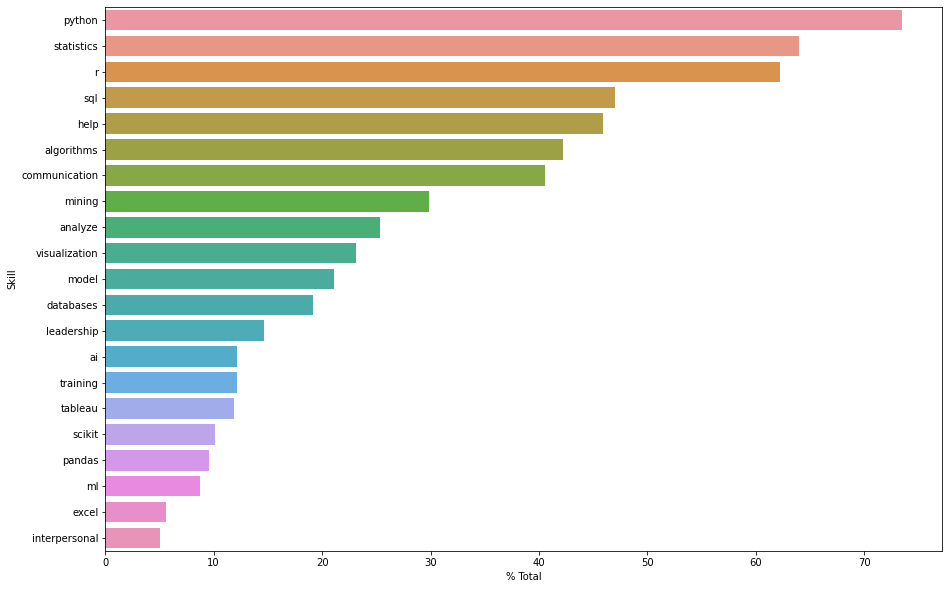

In [44]:
#We want to visualze the percentage of appearances of each skill in all data scientist job postings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(15, 10))
sns_plot = sns.barplot(y='Skill',x = '% Total', data = df)

fig = sns_plot.get_figure()
fig.savefig("skills-data-scientist-usa.png")


In [ ]:
states = pd.DataFrame(clean_usa['loc_code'].value_counts())
states = states.reset_index()
states

In [ ]:
cities = states['index']
counts = states['loc_code']

In [ ]:
positions = pd.DataFrame(clean_usa['pos_clean'].value_counts())
positions = positions.reset_index()
positions[:20]